


<center><font size=10>Data Science and Engineering</center></font>
<center><font size=6>"Automobile Price Forecasting: A Case Study on Geely in the US"</center></font>

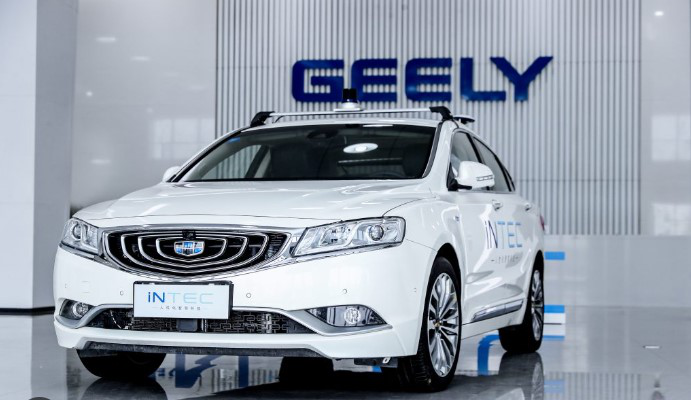

In [1]:
from PIL import Image
image=Image.open("geely car image2.jpeg")
image

**LIBERRARY**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.preprocessing import PowerTransformer

import random
import statsmodels.stats.weightstats as wstats
import statsmodels.stats.multicomp as multi
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow


from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,SGDRegressor,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,cross_val_score,LeaveOneOut
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import roc_auc_score,roc_curve,cohen_kappa_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,AdaBoostClassifier,AdaBoostRegressor,VotingClassifier,VotingRegressor,StackingClassifier,StackingClassifier
from xgboost import XGBClassifier,XGBRegressor


from warnings import filterwarnings
filterwarnings('ignore')


import pickle

In [3]:
data=pd.read_csv('car_prices.csv')

In [4]:
data.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


# PROBLEM STATEMENT

`A Chinese automobile company Geely Auto aspires` to enter the US market by setting up their
manufacturing unit there and producing cars locally to give competition to their US and
European counterparts.
They have contracted an automobile consulting company to understand the factor on which the
price of cars depends. Specifically, they want to understand the factors affecting the pricing of
cars in the American market, since those may be very different from the Chinese market. The
company wants to know:
● Which variables are significant in predicting the price of a car.
● How well those variables describe the price of a car.
Based on various market surveys, the consulting firm has gathered a large dataset of different
types of cars across the American market.


**Attributes**

* TREATMENT OF REDUNDENT COLUMNS

In [5]:
data['CarName']

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [6]:
data.drop(columns='car_ID',inplace=True)

In [7]:
data['Carcompany']=data['CarName'].apply(lambda x : x.split()[0])

In [8]:
data.drop(columns='CarName',inplace=True)

In [9]:
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'Carcompany'],
      dtype='object')

In [10]:
data['Carcompany'].value_counts()

Carcompany
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [11]:
num_cols=['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm', 'citympg', 'highwaympg',
       'price']

In [12]:
cat_col=['symboling','fueltype','aspiration','doornumber','enginetype','drivewheel','enginelocation','cylindernumber','fuelsystem','Carcompany']

In [13]:
data[num_cols].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


* CATEGORY COLUMNS CLASSES

In [14]:
for i in cat_col:
    print(round(data[i].value_counts(normalize=True)*100))
    print()

symboling
 0    33.0
 1    26.0
 2    16.0
 3    13.0
-1    11.0
-2     1.0
Name: proportion, dtype: float64

fueltype
gas       90.0
diesel    10.0
Name: proportion, dtype: float64

aspiration
std      82.0
turbo    18.0
Name: proportion, dtype: float64

doornumber
four    56.0
two     44.0
Name: proportion, dtype: float64

enginetype
ohc      72.0
ohcf      7.0
ohcv      6.0
dohc      6.0
l         6.0
rotor     2.0
dohcv     0.0
Name: proportion, dtype: float64

drivewheel
fwd    59.0
rwd    37.0
4wd     4.0
Name: proportion, dtype: float64

enginelocation
front    99.0
rear      1.0
Name: proportion, dtype: float64

cylindernumber
four      78.0
six       12.0
five       5.0
eight      2.0
two        2.0
three      0.0
twelve     0.0
Name: proportion, dtype: float64

fuelsystem
mpfi    46.0
2bbl    32.0
idi     10.0
1bbl     5.0
spdi     4.0
4bbl     1.0
mfi      0.0
spfi     0.0
Name: proportion, dtype: float64

Carcompany
toyota         15.0
nissan          8.0
mazda           7.

In [15]:
data['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

# DATA PREPROCESSING

**null**

In [16]:
data.isnull().sum().sum()


0

In [17]:
data['enginesize'].value_counts()

enginesize
122    15
92     15
97     14
98     14
108    13
90     12
110    12
109     8
120     7
141     7
152     6
181     6
146     6
121     6
156     5
136     5
91      5
183     4
130     4
171     3
70      3
194     3
209     3
164     3
258     2
140     2
134     2
234     2
132     2
131     2
173     1
203     1
161     1
80      1
151     1
103     1
304     1
308     1
326     1
119     1
111     1
79      1
61      1
145     1
Name: count, dtype: int64

**DUPLICATES**

In [18]:
data[data.duplicated()]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Carcompany


In [19]:
data.duplicated().sum()

0

In [20]:
data.drop_duplicates(inplace=True)

#### OUTLIERS**

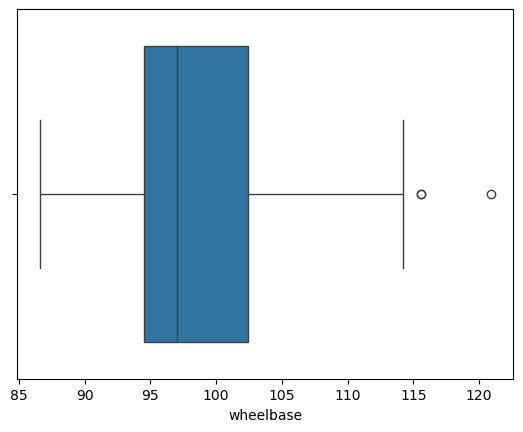

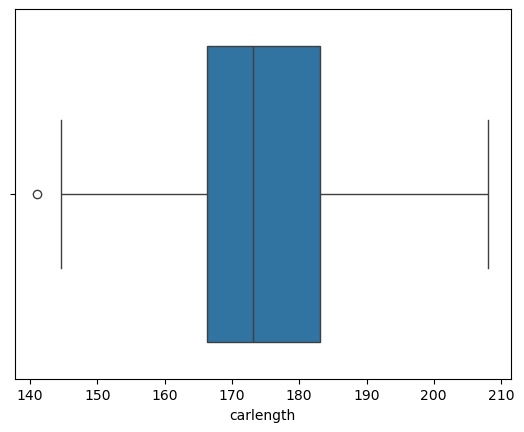

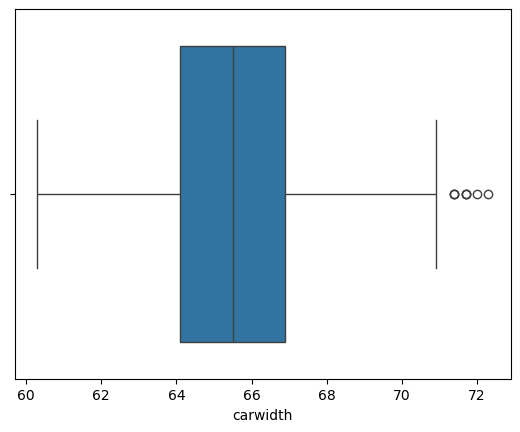

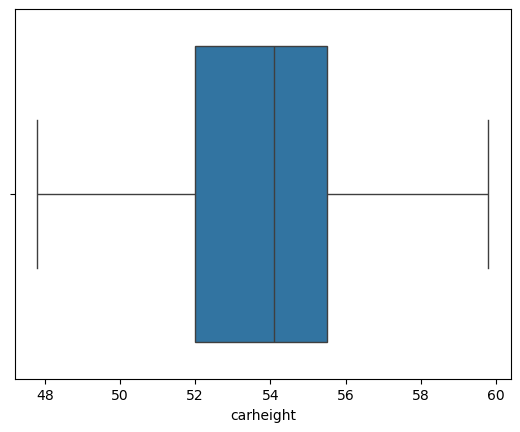

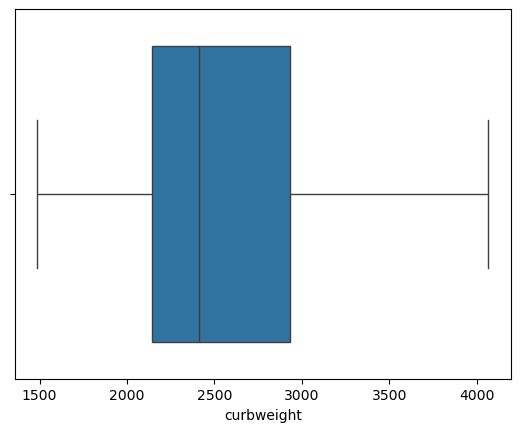

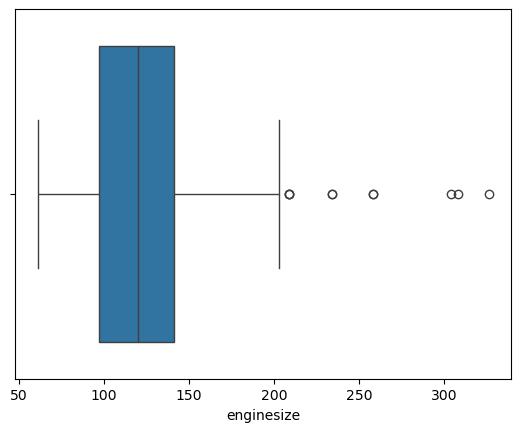

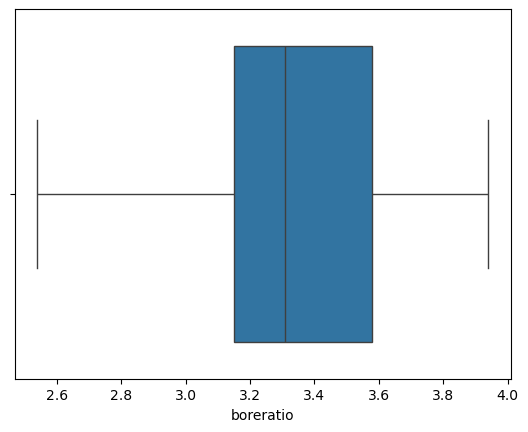

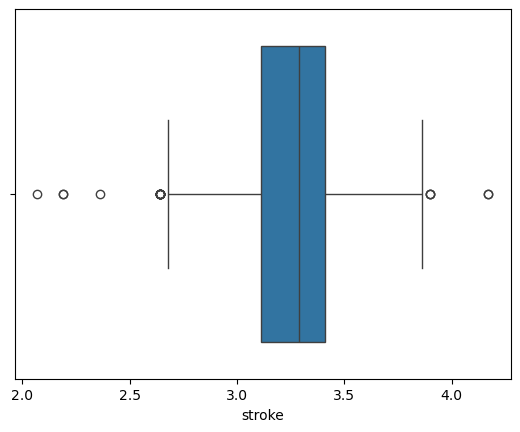

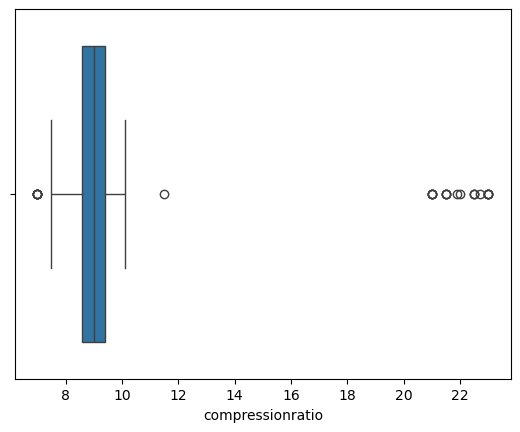

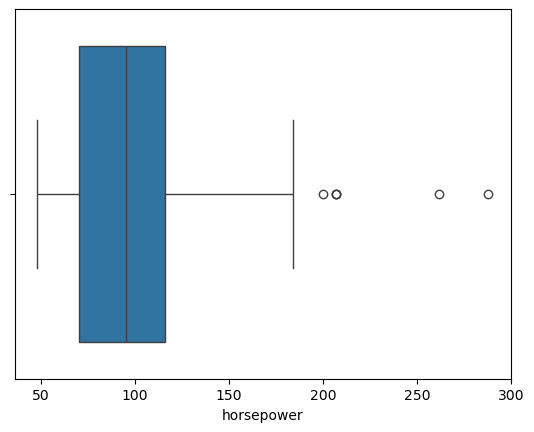

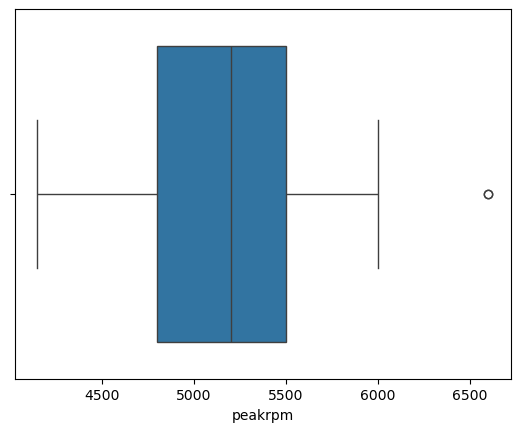

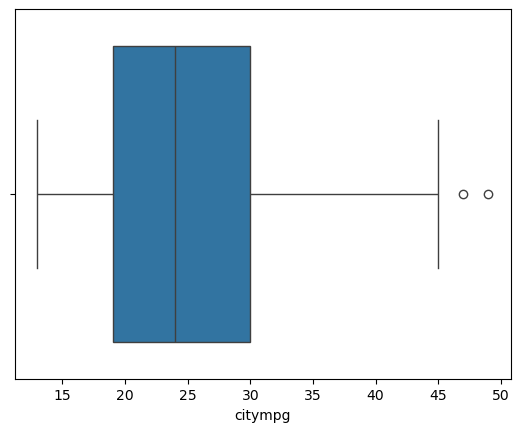

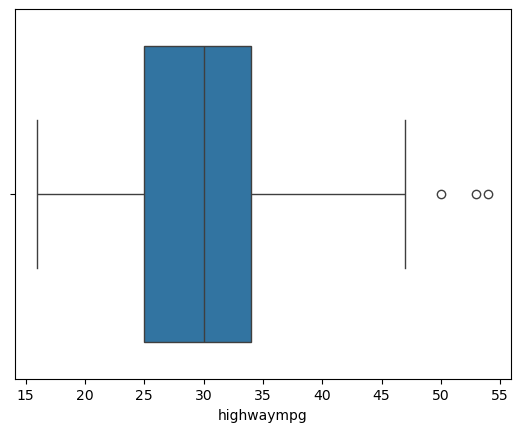

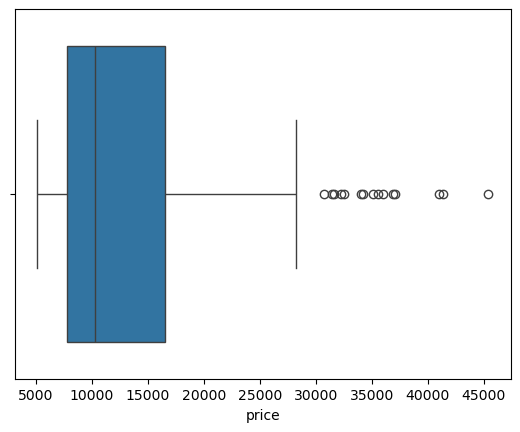

In [21]:
t=1
for i in num_cols:
    sns.boxplot(data=data[num_cols],x=i)
    plt.show()

**model have outliers**

* there are some outliers in `[[ wheel base,car length,car_width,engine size,stroke,horshpower,peakrpm,citymog,highwaympg,price,milage,compresor]]*`

##### TREATMENT OF OUTLIER

##### `CAPPING OF OUTLIER`

In [22]:
for i in num_cols:
    q3,q1=np.percentile(data[i],[75,25])
    iqr=q3-q1
    ul,ll=q3+1.5*iqr,q1-1.5*iqr
    data[i]=data[i].apply(lambda x:ll if x<ll else ul if x>ul else x )

**AFTER TREATMENT OF OUTLIER**

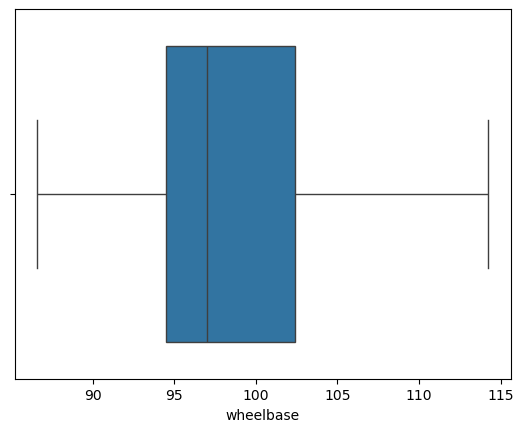

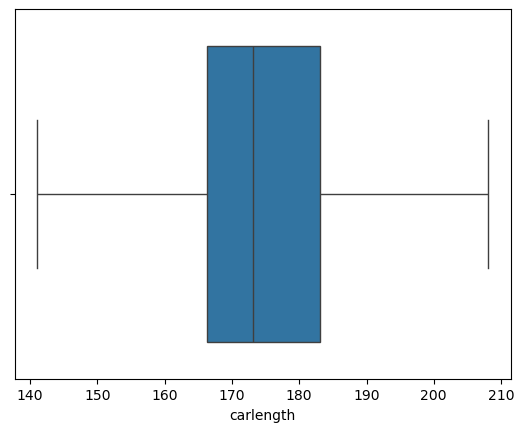

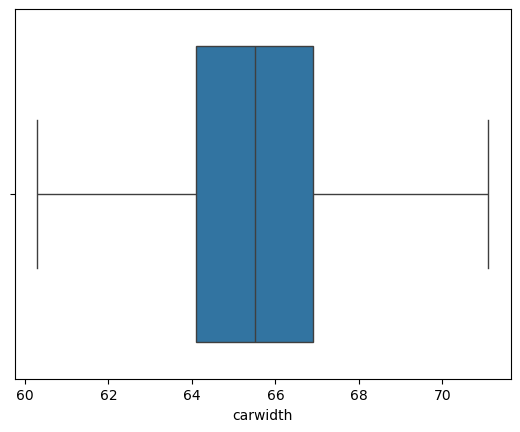

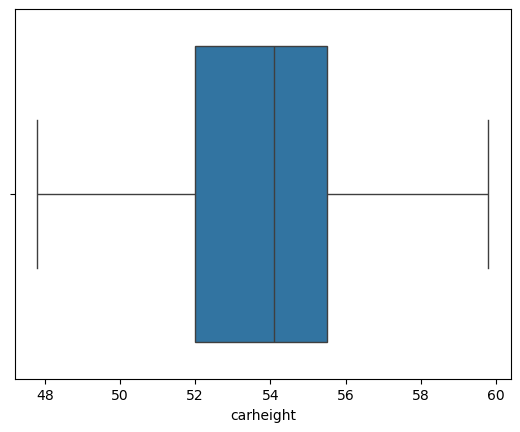

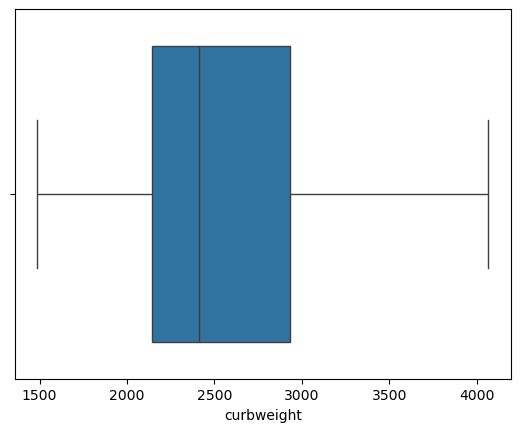

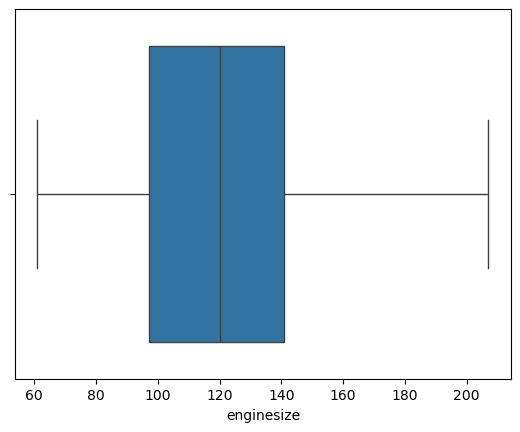

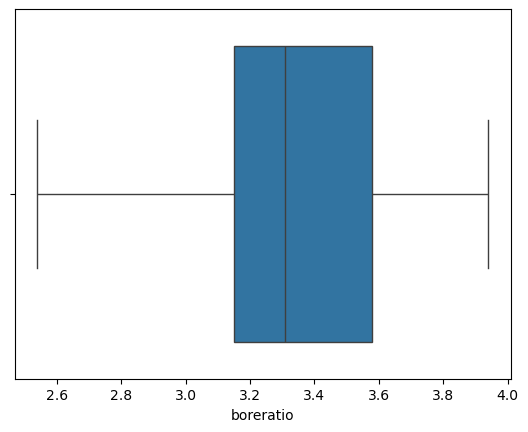

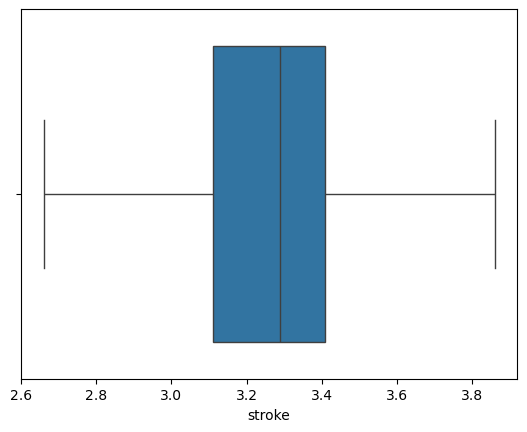

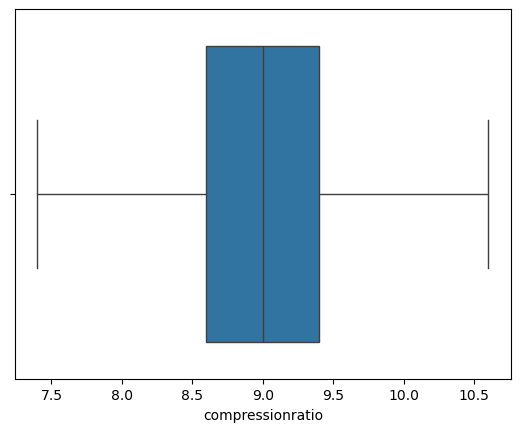

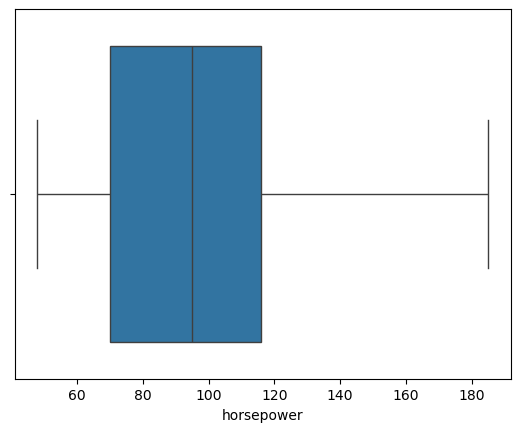

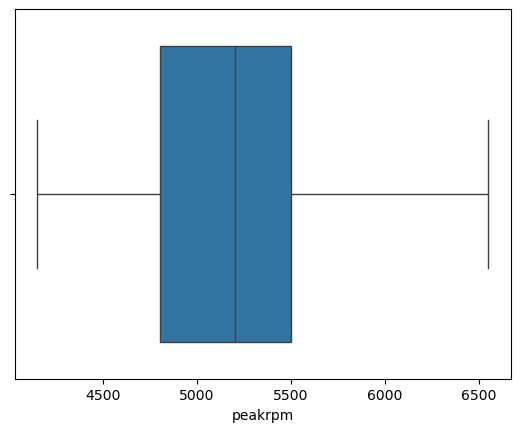

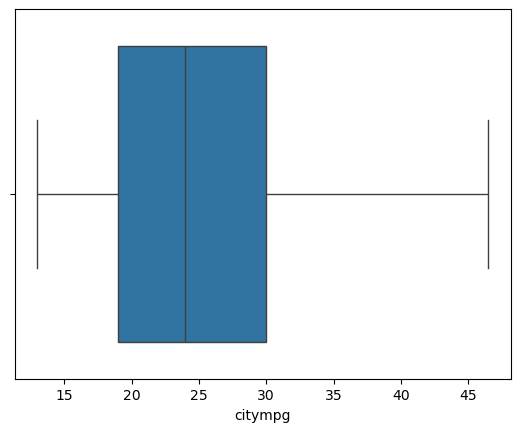

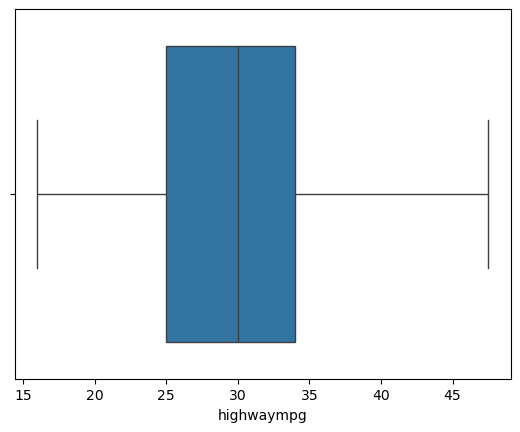

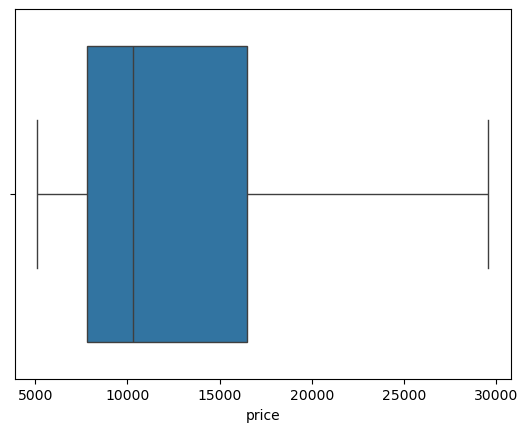

In [23]:
t=1
for i in num_cols:
    sns.boxplot(data=data[num_cols],x=i)
    plt.show()

* HERE WE CAPPED ALL THE OUTLIERS

### CORRELATION BETWEEN `FEATURES` AND `TARGET COLUMN`

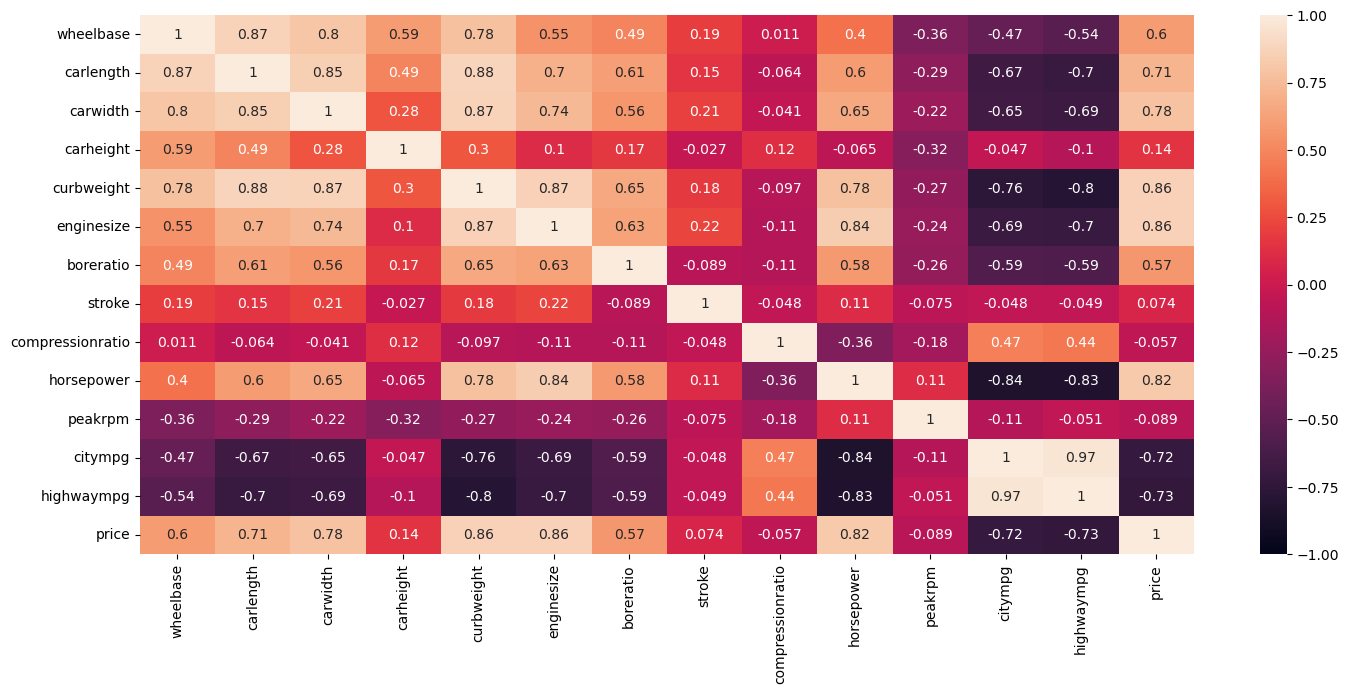

In [24]:
plt.figure(figsize=[17,7])
sns.heatmap(data=data[num_cols].corr(),vmax=1,vmin=-1,annot=True)
plt.show()

* `CITYMPG & HIGHWAYMPG` ARE HIGHLY NEGATIVELY CO-RELATED TO `PRICE`
* `CURB_WEIGHT & ENGINESIZE` ARE POSTIVELY CORRALETED TO `PRICE`

### DROPING INSIGNIFICANT COLUMNS

**FEATURE ENGIINERING**
* AREA=L X B X H

In [25]:
data['car_area']=data['carheight']*data['carlength']*data['carwidth']

**`INSIGNIFICANT COLUMNS`**

In [26]:
data.drop(columns=['compressionratio','boreratio'],inplace=True)

In [27]:
data.drop(columns='carbody',inplace=True)
data.drop(columns='wheelbase',inplace=True)
data.drop(columns='stroke',inplace=True)
data.drop(columns='peakrpm',inplace=True)
data.drop(columns='citympg',inplace=True)
data.drop(columns='highwaympg',inplace=True)
data.drop(columns=['carlength','carwidth','carheight'],inplace=True)

In [28]:
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'drivewheel',
       'enginelocation', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'horsepower', 'price', 'Carcompany',
       'car_area'],
      dtype='object')

In [29]:
num_col=['enginesize',
 'horsepower',
 'price']

In [30]:
cat_col=['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'drivewheel',
 'enginelocation',
 'cylindernumber',
 'fuelsystem',
 'Carcompany']

### `UNIVARIENT ANALYSIS` OF CATEGORY COLUMNS:--

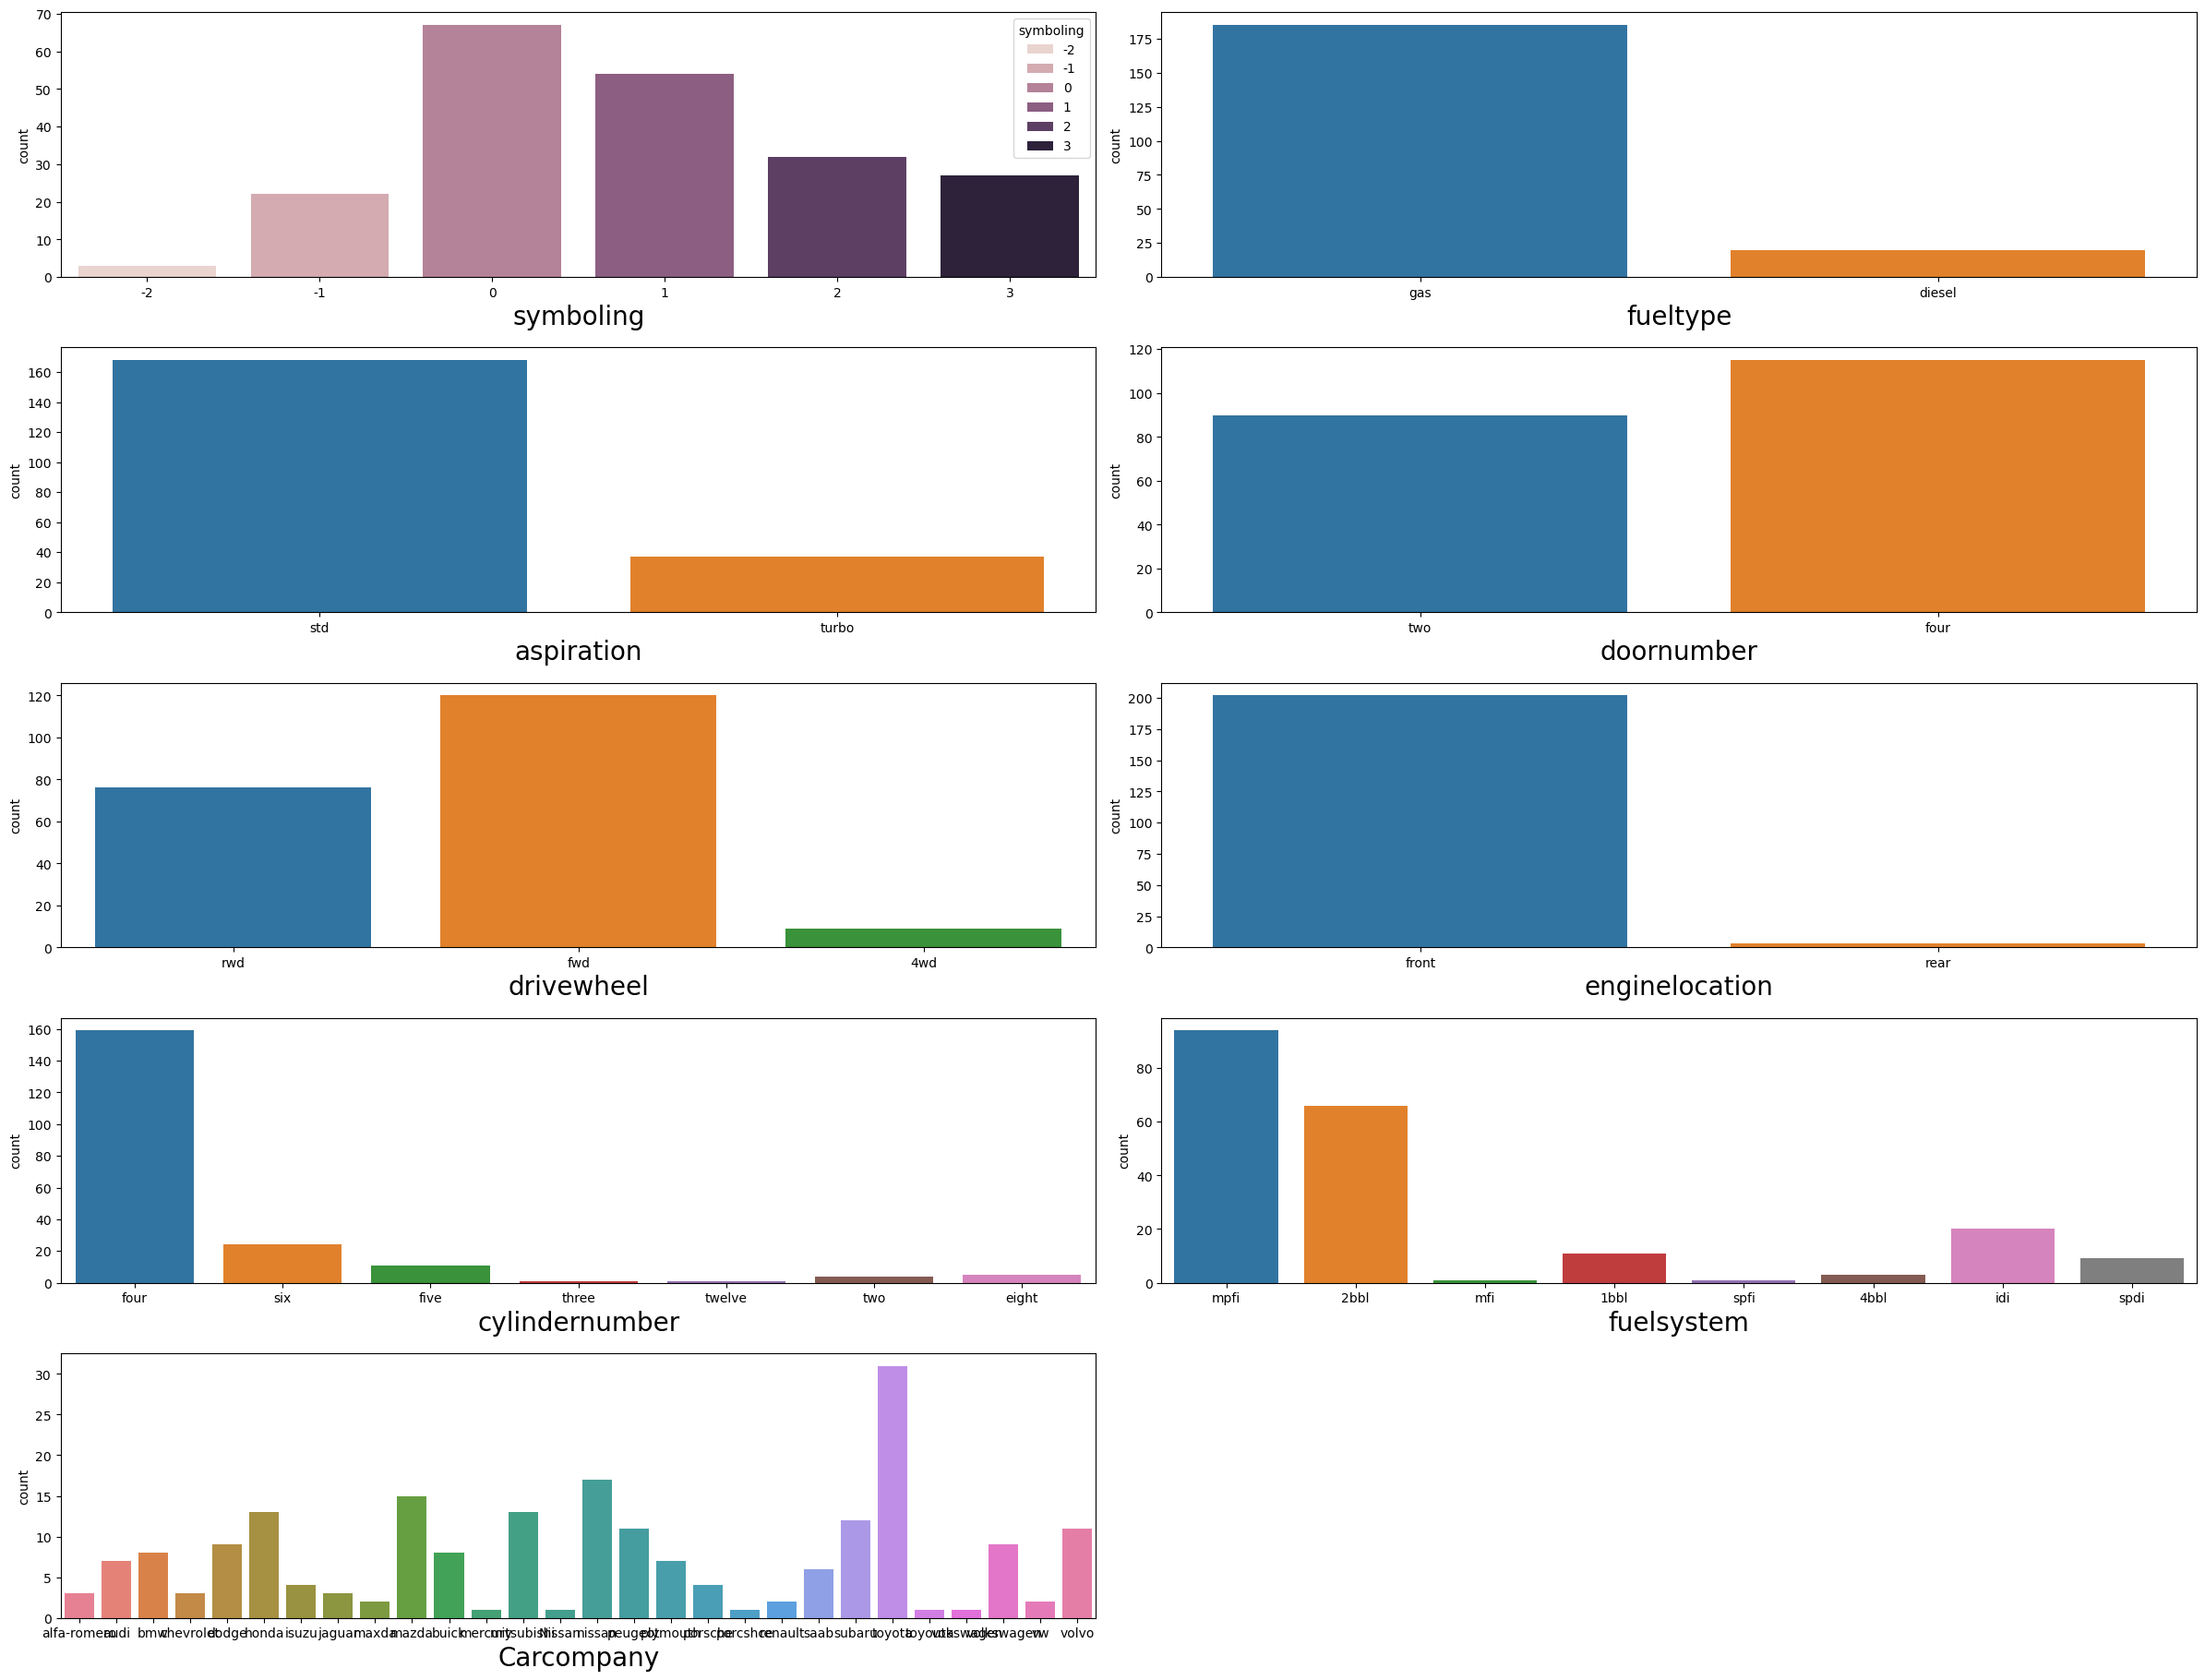

In [31]:
 t=1
plt.figure(figsize=[24,25])
for i in cat_col:
    plt.subplot(7,2,t)
    sns.countplot(data=data,x=i,hue=i)
    t+=1
    plt.xlabel(xlabel=i, fontsize=20)
plt.tight_layout()
plt.show()

**KEY POINTS**

* THERE ARE MORE CARS OF `GAS FUELTYPE`
* `SEDAN CAARBODY` IS MOST USED
* THERE ARE `4-DOORS` & `4-CYLINDERED` CAR ARE MORE PREFERED
* `FRONT-ENGINELOCATION` ARE MORE PREFFERED
* DRIVEWHEEL `FWD` MOSTLY PREFERED
* FUEL-SYSTEM MUST BE `MPFI`

In [32]:
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'drivewheel',
       'enginelocation', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'horsepower', 'price', 'Carcompany',
       'car_area'],
      dtype='object')

## CATEGORY COLUMNS ANALYSIS

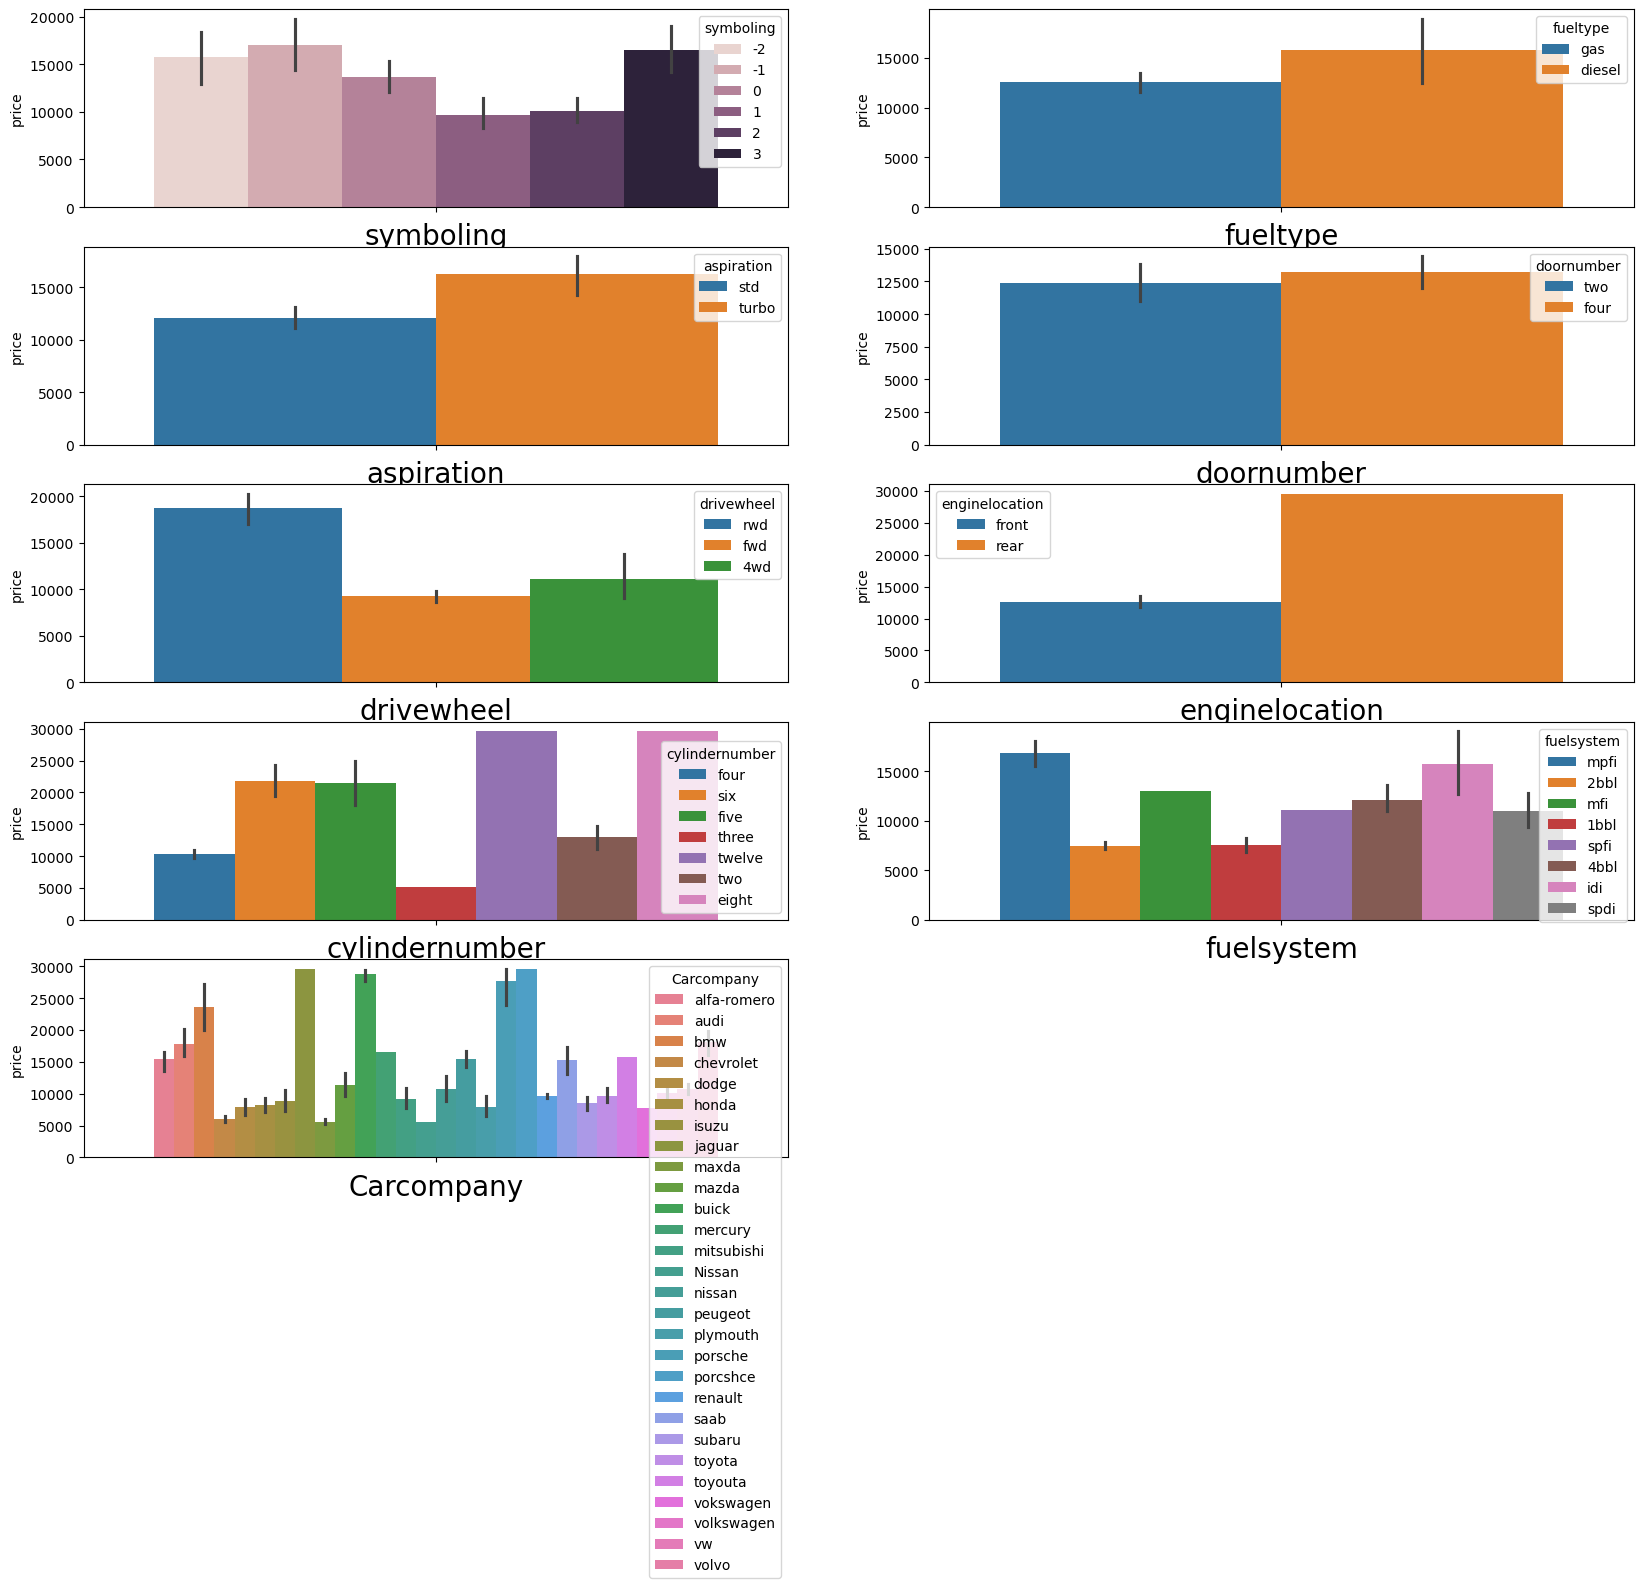

In [33]:
t=1
plt.figure(figsize=(20,18))
for i in cat_col:
    plt.subplot(6,2,t)
    sns.barplot(data=data,y=data['price'],hue=i)
    plt.xlabel(xlabel=i, fontsize=20)
    t=t+1
plt.show()

## ANALYSIS OF TARGET COLUMN WITH FEATURES:

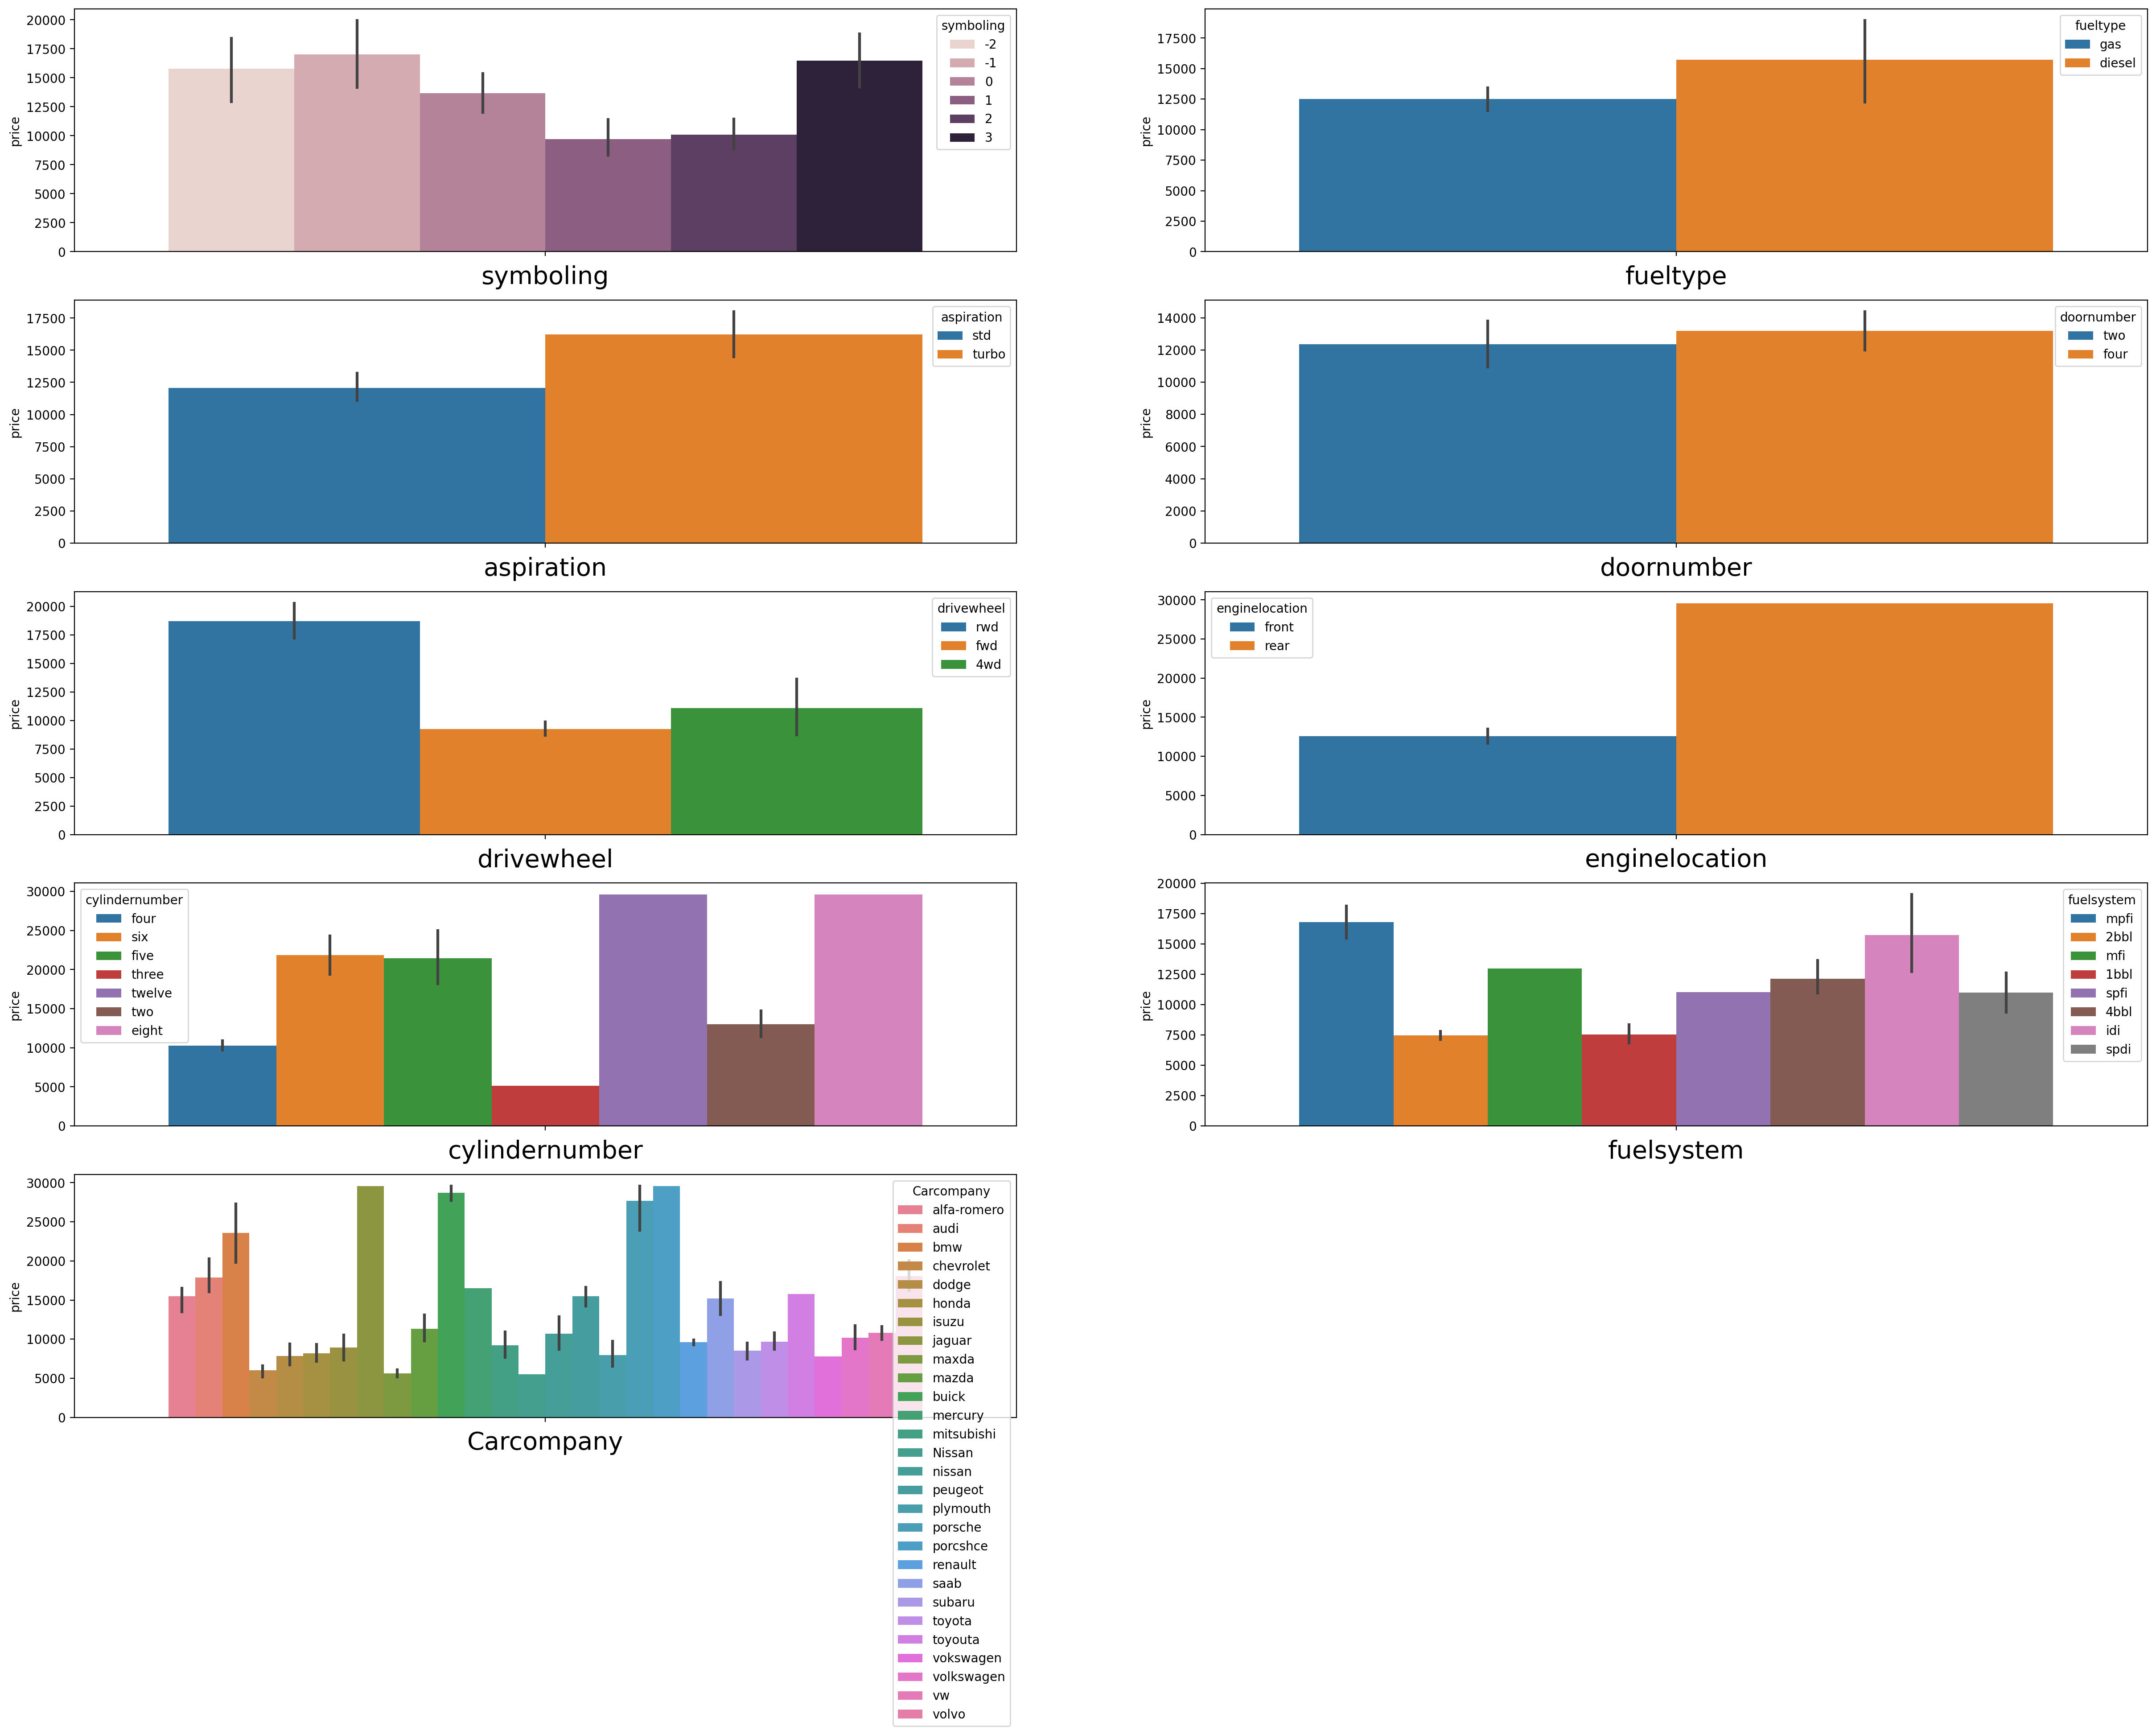

In [34]:
t=1
plt.figure(figsize=(30,29),dpi=200)
for i in cat_col:
    plt.subplot(7,2,t)
    sns.barplot(data=data,y=data['price'],hue=i)
    plt.xlabel(xlabel=i, fontsize=20)
    t=t+1
plt.show()

----------

#### ENCODING

In [35]:
data['fueltype']=data['fueltype'].map({'gas':0,'diesel':1})
data['aspiration']=data['aspiration'].map({'std':0,'turbo':1})
data['doornumber']=data['doornumber'].map({'four':1,'two':0})
data['drivewheel']=data['drivewheel'].map({'fwd':0,'rwd':1,'4wd':2})
data['enginelocation']=data['enginelocation'].map({'front':0,'rear':1})
e_dict=data['enginetype'].value_counts(normalize=True).to_dict()
data['enginetype']=data['enginetype'].map(e_dict)
c_dict=data['cylindernumber'].value_counts(normalize=True).to_dict()
data['cylindernumber']=data['cylindernumber'].map(c_dict)
f_dict=data['fuelsystem'].value_counts(normalize=True).to_dict()
data['fuelsystem']=data['fuelsystem'].map(f_dict)
comp_dic=data['Carcompany'].value_counts(normalize=True).to_dict()
data['Carcompany']=data['Carcompany'].map(comp_dic)


### TRAIN-TEST SPLIT

In [36]:
x=data.drop(columns='price')
y=data['price']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=1)

In [38]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(143, 14) (62, 14) (143,) (62,)


### `Statistically analysis`**

In [39]:
y.mean()

12831.310570731706

In [40]:
y_train.mean()

13103.613055944055

In [41]:
y_test.mean()

12203.258064516129

**we have to check statistically  PROVE that is data of `mean of ytrain= mean of ytest or not`**

* ASSUMPTION OF TWO SAMPLE T-TEST

In [42]:
st,p_val=stats.shapiro(y_train)

if p_val>0.05:
    print('Data is NORMAL')
else:
    print('DATA IS NOT NORMAL')

DATA IS NOT NORMAL


In [43]:
sample1=y_train
sample2=y_test

In [44]:
st,pval=stats.levene(sample1,sample2)

if pval>0.05:
    print('DATA HAVE EQUAL VARIENCE')
else:
    print('UNEQUAL VARIENCE')

DATA HAVE EQUAL VARIENCE


**HYPOTHESIS**

##### TWO SAMPLE T-TEST

In [45]:
tstats,p_val=stats.mannwhitneyu(sample1,sample2)

# **with 95% confidence level**

if 2*p_val>0.05:
    print('fail to reject ho')
else:
    print('reject ho')

fail to reject ho


**hence we can say ``mu1 = mu2``**

# `MODEL FITTING`

# LOGIC REGRESSOR MODEL

In [46]:
MODEL=sma.OLS(y,sma.add_constant(x)).fit()

In [47]:
MODEL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     116.9
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           2.86e-85
Time:                        21:23:34   Log-Likelihood:                -1865.0
No. Observations:                 205   AIC:                             3760.
Df Residuals:                     190   BIC:                             3810.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8343.5682   1979.431     -4.215      0.000   -1.22e+04   -4439.085
symboling        -49.0291    182.712     -0.268      0.789    -409.435     311.376
fueltype        2611.7894    903.127      2.892      0.004     830.345    4393.234
aspiration      -550.4573    625.602     -0.880      0.380   -1784.475     683.560
doornumber      -156.7623    469.813     -0.334      0.739   -1083.482     769.958
drivewheel       760.9184    375.391      2.027      0.044      20.450    1501.387
enginelocation  8808.3649   1577.078      5.585      0.000    5697.534    1.19e+04
curbweight         5.8195      1.273      4.571      0.000       3.308       8.331
enginetype      3074.5058    661.782      4.646      0.000    1769.123    4379.888
cylindernumber -4878.7358    781.724     -6.241      0.000   -6420.708   -3336.764
enginesize         7.8949     13.995      0.564      0.573     -19.710      35.500
fuelsystem      2892.1463   1495.973      1.933      0.055     -58.702    5842.995
horsepower        46.9498     13.919      3.373      0.001      19.493      74.406
Carcompany     -1.824e+04   4012.623     -4.546      0.000   -2.62e+04   -1.03e+04
car_area           0.0025      0.005      0.514      0.608      -0.007       0.012
==============================================================================
Omnibus:                        2.323   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.960
Skew:                          -0.167   Prob(JB):                        0.375
Kurtosis:                       3.344   Cond. No.                     1.61e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### MODEL NORMALITY CHECK

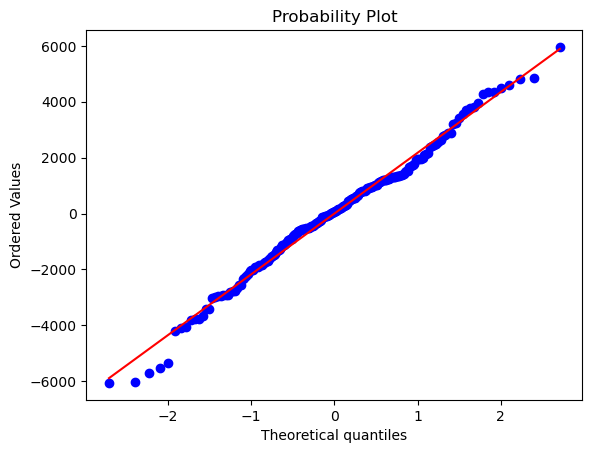

In [48]:
stats.probplot(MODEL.resid,plot=plt)
plt.show()

* MODEL IS APPROX NORMAL 

-----------

### MULTI-COLENIARITY

* BEFORE TREAT MULTICOL...

In [49]:
vif_list=[]
for i in range(x.shape[1]):
    vif_list.append(variance_inflation_factor(x.values,i))

In [50]:
pd.DataFrame({'VIF':vif_list},index=x.columns)

,VIF
symboling,2.653906
fueltype,3.215302
aspiration,2.795771
doornumber,4.972225
drivewheel,3.126699
enginelocation,1.460929
curbweight,448.024077
enginetype,6.453483
cylindernumber,9.890481
enginesize,132.703739


#### Treat multicolinearity & feature enginnering**

**TREAT-MULTICOLINEARITY**

* checking of significant columns for prediction 

In [51]:
sma.OLS(y,sma.add_constant(x.drop(columns=['curbweight']))).fit().rsquared

0.8845100919835865

#### COLUMNS WE HAVE TO DROP ARE HAVINGH HIGH MULTI COLINEARITY
* carbody
* wheelbase
* enginesize
* peakrpm
* citympg
* highwaympg
* carlength
* carwidth
* carheight

#### We CAN NOT DROP THESE UNTIL WE HAVE HIGH MULTICOLINEARITY.
* cylindernumber
* stroke
* car_area
* cylindernumber
* stroke
* horsepower
* curbweight

**TREATED COLUMNS**

In [52]:
vif_list=[]
for i in range(x.shape[1]):
    vif_list.append(variance_inflation_factor(x.values,i))

In [53]:
pd.DataFrame({'VIF':vif_list},index=x.columns)

,VIF
symboling,2.653906
fueltype,3.215302
aspiration,2.795771
doornumber,4.972225
drivewheel,3.126699
enginelocation,1.460929
curbweight,448.024077
enginetype,6.453483
cylindernumber,9.890481
enginesize,132.703739


##### FINAL LR MODEL

In [54]:
full_model=sma.OLS(y,sma.add_constant(x)).fit()

In [55]:
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     116.9
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           2.86e-85
Time:                        21:23:34   Log-Likelihood:                -1865.0
No. Observations:                 205   AIC:                             3760.
Df Residuals:                     190   BIC:                             3810.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8343.5682   1979.431     -4.215      0.000   -1.22e+04   -4439.085
symboling        -49.0291    182.712     -0.268      0.789    -409.435     311.376
fueltype        2611.7894    903.127      2.892      0.004     830.345    4393.234
aspiration      -550.4573    625.602     -0.880      0.380   -1784.475     683.560
doornumber      -156.7623    469.813     -0.334      0.739   -1083.482     769.958
drivewheel       760.9184    375.391      2.027      0.044      20.450    1501.387
enginelocation  8808.3649   1577.078      5.585      0.000    5697.534    1.19e+04
curbweight         5.8195      1.273      4.571      0.000       3.308       8.331
enginetype      3074.5058    661.782      4.646      0.000    1769.123    4379.888
cylindernumber -4878.7358    781.724     -6.241      0.000   -6420.708   -3336.764
enginesize         7.8949     13.995      0.564      0.573     -19.710      35.500
fuelsystem      2892.1463   1495.973      1.933      0.055     -58.702    5842.995
horsepower        46.9498     13.919      3.373      0.001      19.493      74.406
Carcompany     -1.824e+04   4012.623     -4.546      0.000   -2.62e+04   -1.03e+04
car_area           0.0025      0.005      0.514      0.608      -0.007       0.012
==============================================================================
Omnibus:                        2.323   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.960
Skew:                          -0.167   Prob(JB):                        0.375
Kurtosis:                       3.344   Cond. No.                     1.61e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**WE GOT 89% ACCURATE MODEL USING LR MODEL**

### DUE TO MULTICOLENIARITY WE CAN USE `RIDGE MODEL`

In [56]:
rid=Ridge()

In [57]:
rid.fit(x_train,y_train)

Ridge()

In [58]:
y_ridge_test=rid.predict(x_test)
y_ridge_train=rid.predict(x_train)

* ERROR SCORES OF TRAIN & TEST

In [59]:
print('R2:',r2_score(y_train,y_ridge_train))
print('MSE:',mean_squared_error(y_train,y_ridge_train))
print('RMSE:',mean_squared_error(y_train,y_ridge_train)**0.5)
print('MAE:',mean_absolute_error(y_train,y_ridge_train))
print('MAPE:',mean_absolute_percentage_error(y_train,y_ridge_train))

print('\n')

print('R2:',r2_score(y_test,y_ridge_test))
print('MSE:',mean_squared_error(y_test,y_ridge_test))
print('RMSE:',mean_squared_error(y_test,y_ridge_test)**0.5)
print('MAE:',mean_absolute_error(y_test,y_ridge_test))
print('MAPE:',mean_absolute_percentage_error(y_test,y_ridge_test))

R2: 0.8845031372547013
MSE: 5318702.9241768215
RMSE: 2306.2313249491735
MAE: 1782.7104659054671
MAPE: 0.14085208406037603


R2: 0.8761390502147813
MSE: 5159771.669077994
RMSE: 2271.5130792223044
MAE: 1697.6057271854274
MAPE: 0.145009214142932


**==MODEL HAVE HIGH VARIENCE AND OVERFITTED**

###### MODEL COFICIENT

In [60]:
pd.DataFrame({'COEF_RIDGE':rid.coef_},index=x_train.columns)

,COEF_RIDGE
symboling,235.615916
fueltype,2905.389486
aspiration,-986.018507
doornumber,173.475958
drivewheel,603.763836
enginelocation,5925.194256
curbweight,4.447262
enginetype,2078.038430
cylindernumber,-3992.583817
enginesize,25.209715


* CAR AREA 
* WHEEL BASE
* PEAKRPM

* 
**THESE ARE SOME INSIGNIFICANT COLUMNS TO PREDICT PRICE**

##### WE GOT `89%` ACCURACY OF DATA USING BASIC MODLE OF LINEAR REGRESSION

-------------

------

**BEST MODEL PREDICTION**

In [61]:
# Lists to store results for regression models
mod = []
r_squared = []
mae = []
mse = []
rmse = []
mape = []

# Regression model validation function
def model_validation(model, xtrain, ytrain, xtest, ytest):
    # Step 1: Fit the model
    model.fit(xtrain, ytrain)
    
    # Step 2: Make predictions
    y_pred = model.predict(xtest)
    
    # Step 3: Calculate regression metrics
    r2 = r2_score(ytest, y_pred)
    mse_val = mean_squared_error(ytest, y_pred)
    mae_val = mean_absolute_error(ytest, y_pred)
    rmse_val = np.sqrt(mse_val)
    mape_val = mean_absolute_percentage_error(y_test,y_pred)
        
    # Print metrics
    print(f"R-Squared: {round(r2,2)}")
    print(f"Mean Absolute Error (MAE): {round(mae_val,2)}")
    print(f"Mean Squared Error (MSE): {round(mse_val,2)}")
    print(f"Root Mean Squared Error (RMSE): {round(rmse_val,2)}")
    print(f"Mean absolute percentage Error(MAPE) : {round(mape_val,2)}")
    
    # Step 4: Plot residuals
    residuals = ytest - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f'Residuals Plot')
    plt.show()
    
    # Step 5: Ask if user wants to save the result
    ans = input('Do you want to save the result? Y/N: ')
    if ans.lower() == 'y':
        mod.append(str(model))
        r_squared.append(r2)
        mae.append(mae_val)
        mse.append(mse_val)
        rmse.append(rmse_val)
        mape.append(mape_val)
        
        # Step 6: Update the scorecard with results
        global scorecard_reg
        scorecard_reg = pd.DataFrame({
            'Model': mod,
            'R-Squared': r_squared,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'MAPE': mape})
        print("\nResults saved to regression scorecard!")
    else:
        return


**MODEL TUNING**

In [62]:
def tuning_parameter(grid,estimator,x,y,score = 'r2'):
    gscv=GridSearchCV(estimator=estimator,param_grid=grid,verbose=1,scoring=score)
    gscv.fit(x,y)
    return gscv.best_params_

**BEST MODEL CHECKING**

# 1-RANDOM_FOREST

R-Squared: 0.93
Mean Absolute Error (MAE): 1074.28
Mean Squared Error (MSE): 2742960.26
Root Mean Squared Error (RMSE): 1656.19
Mean absolute percentage Error(MAPE) : 0.09


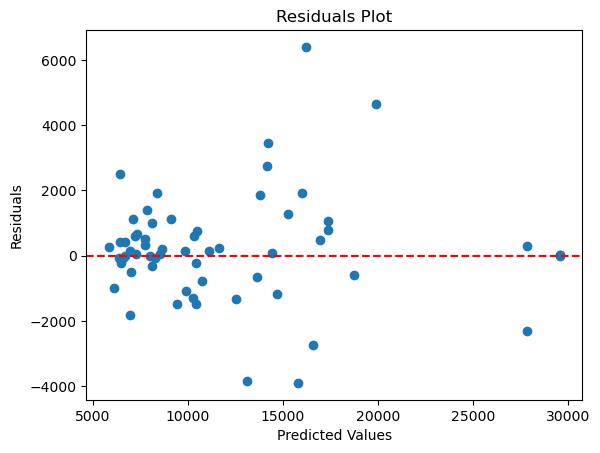

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [63]:
model_validation(RandomForestRegressor(),x_train,y_train,x_test,y_test)

# 2-GRADIENT BOOST REGRESSOR

R-Squared: 0.92
Mean Absolute Error (MAE): 1195.72
Mean Squared Error (MSE): 3154215.35
Root Mean Squared Error (RMSE): 1776.01
Mean absolute percentage Error(MAPE) : 0.11


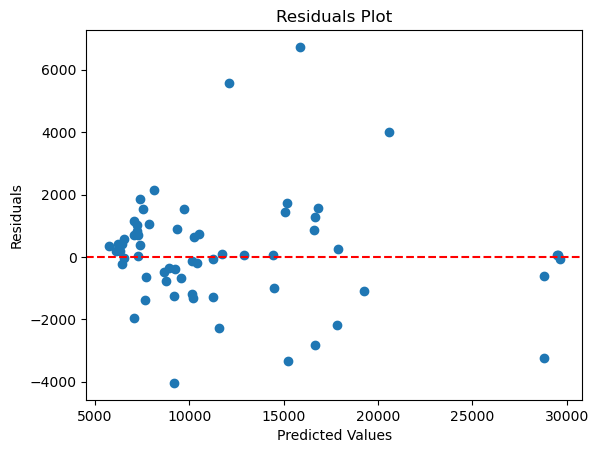

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [64]:
model_validation(GradientBoostingRegressor(),x_train,y_train,x_test,y_test)

## 3-(XG-BOOST)

R-Squared: 0.93
Mean Absolute Error (MAE): 1083.74
Mean Squared Error (MSE): 3030860.8
Root Mean Squared Error (RMSE): 1740.94
Mean absolute percentage Error(MAPE) : 0.09


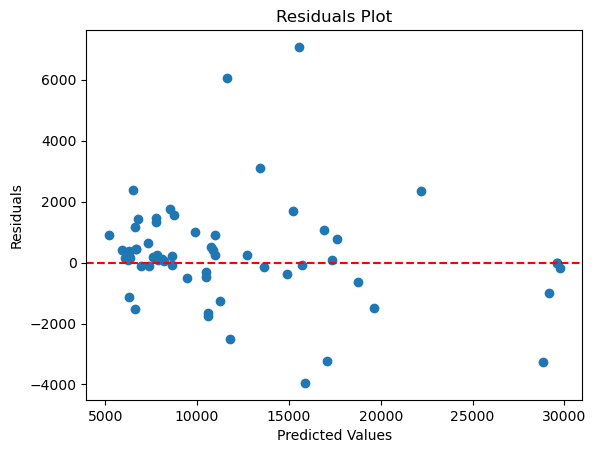

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [65]:
model_validation(XGBRegressor(),x_train,y_train,x_test,y_test)

# 4-ADA BOOST REGRESSOR

R-Squared: 0.91
Mean Absolute Error (MAE): 1425.39
Mean Squared Error (MSE): 3779519.56
Root Mean Squared Error (RMSE): 1944.1
Mean absolute percentage Error(MAPE) : 0.13


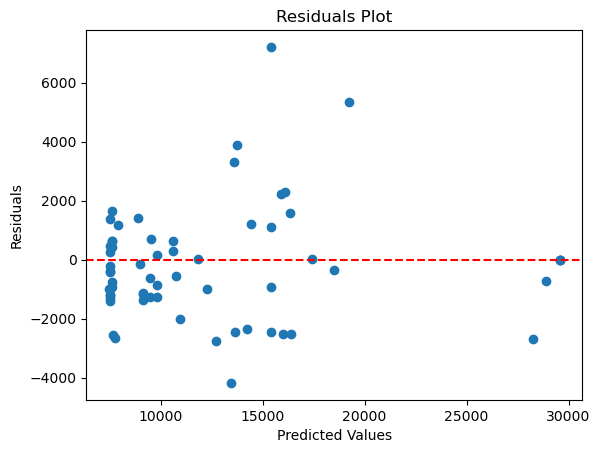

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [66]:
model_validation(AdaBoostRegressor(),x_train,y_train,x_test,y_test)

**SCORECARD OF ALL MODELS**

In [67]:
scorecard_reg

,Model,R-Squared,MAE,MSE,RMSE,MAPE
0,RandomForestRegressor(),0.934155,1074.278346,2.742960e+06,1656.188473,0.091644
1,GradientBoostingRegressor(),0.924283,1195.722489,3.154215e+06,1776.011077,0.109112
2,"XGBRegressor(base_score=None, booster=None, ca...",0.927244,1083.736375,3.030861e+06,1740.936760,0.092057
3,AdaBoostRegressor(),0.909272,1425.387995,3.779520e+06,1944.098651,0.133238


* XGBOOST IS THE BEST MODEL ACCORDING TO SCORES SO WE HAVE TO FURTHER FINE TUNE IT

### TUNING OF XG-BOOST

In [68]:
best_xg = tuning_parameter(grid={'n_estimators':[150,200,250,],
                                   'learning_rate':[0.05,0.1,0.5,0.7,2],
                                  'max_depth':[2,3,4,5] ,'min_child_weight':[3,4,5,6,7],
                                 'gamma':[0.5,0.7,1]},
                           estimator=XGBRegressor(),x=x_train,y=y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


In [69]:
best_xg

{'gamma': 0.5,
 'learning_rate': 0.05,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 150}

R-Squared: 0.93
Mean Absolute Error (MAE): 1143.8
Mean Squared Error (MSE): 2983647.4
Root Mean Squared Error (RMSE): 1727.32
Mean absolute percentage Error(MAPE) : 0.1


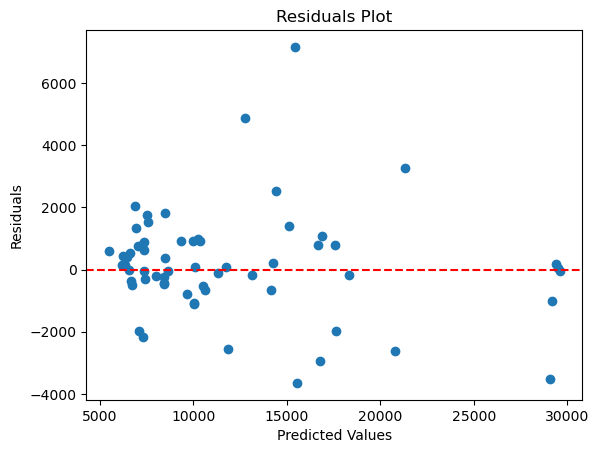

Do you want to save the result? Y/N:  y



Results saved to regression scorecard!


In [70]:
model_validation(XGBRegressor(**best_xg),x_train,y_train,x_test,y_test)

In [71]:
scorecard_reg

,Model,R-Squared,MAE,MSE,RMSE,MAPE
0,RandomForestRegressor(),0.934155,1074.278346,2.742960e+06,1656.188473,0.091644
1,GradientBoostingRegressor(),0.924283,1195.722489,3.154215e+06,1776.011077,0.109112
2,"XGBRegressor(base_score=None, booster=None, ca...",0.927244,1083.736375,3.030861e+06,1740.936760,0.092057
3,AdaBoostRegressor(),0.909272,1425.387995,3.779520e+06,1944.098651,0.133238
4,"XGBRegressor(base_score=None, booster=None, ca...",0.928377,1143.798584,2.983647e+06,1727.323769,0.099054


## FINAL MODEL

In [81]:
final_model = XGBRegressor()

In [82]:
final_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [83]:
pred_final =final_model.predict(x_test)

**FINAL SCORES**

In [84]:
print('R2:',r2_score(y_test,pred_final))
print('MSE:',mean_squared_error(y_test,pred_final))
print('RMSE:',mean_squared_error(y_test,pred_final)**0.5)
print('MAE:',mean_absolute_error(y_test,pred_final))
print('MAPE:',mean_absolute_percentage_error(y_test,pred_final))

R2: 0.9272438158427114
MSE: 3030860.803311871
RMSE: 1740.9367602850687
MAE: 1083.7363753780241
MAPE: 0.09205670582947698


# BUSSINESS INTERPRETATION

**THE FEATURES WHICH CAN BE ABLE TO `INCREASE` CAR PRICE `TREMENDIUSLY` ARE:-**
* ENGINESIZE
* ENGINELOCATION
* ENGINETYPE
* FUELTYPE


**THE FEATURES WHICH CAN BE ABLE TO `INCREASE` CAR PRICE `MODERATELY` ARE:-**
* HORSHPOWER
* FUELSYSTUM
* SYMBOLING


**THE FEATURES WHICH CAN BE ABLE TO `DECREASE` CAR PRICE ARE:-**
* CYLINDERNUMBER
* ASPIRATION
* STROKE

#### SUGGESTION

SO WE HAVE TO FOCUS ON 
`[ENGINELOCATION,
ENGINETYPE,
FUELTYPE,
ENGINESIZE]`
TO INCREASE THE CAR PRICE PROFITABILTY

-------------

In [76]:
fi=final_model.feature_importances_

In [77]:
fi_data = pd.DataFrame({'Feature Importance':fi},index=x_train.columns).sort_values(by='Feature Importance',ascending=False)

In [78]:
fi_data

,Feature Importance
enginesize,0.424098
horsepower,0.279915
curbweight,0.129691
cylindernumber,0.080521
fueltype,0.028436
Carcompany,0.019420
enginetype,0.013611
drivewheel,0.005252
aspiration,0.004874
car_area,0.004241


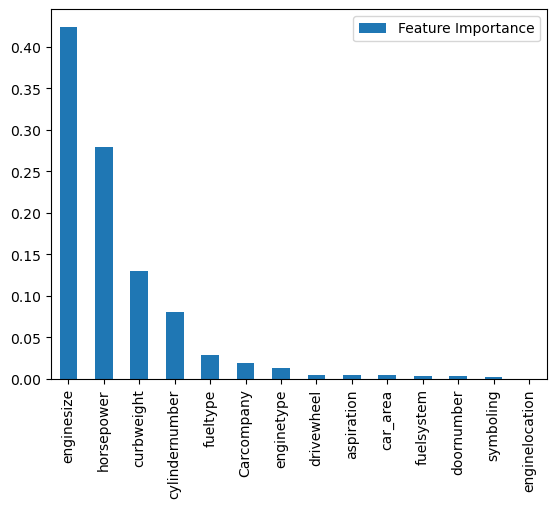

In [79]:
fi_data.plot(kind='bar')
plt.show()

# DEPLOYEMENT

In [80]:
# Save the final model as a pickle file

with open('final_model_XGBoost.pkl','wb') as file:
    pickle.dump(final_model,file)